Graph saved as multishot_lastToken_FVsucc.pdf


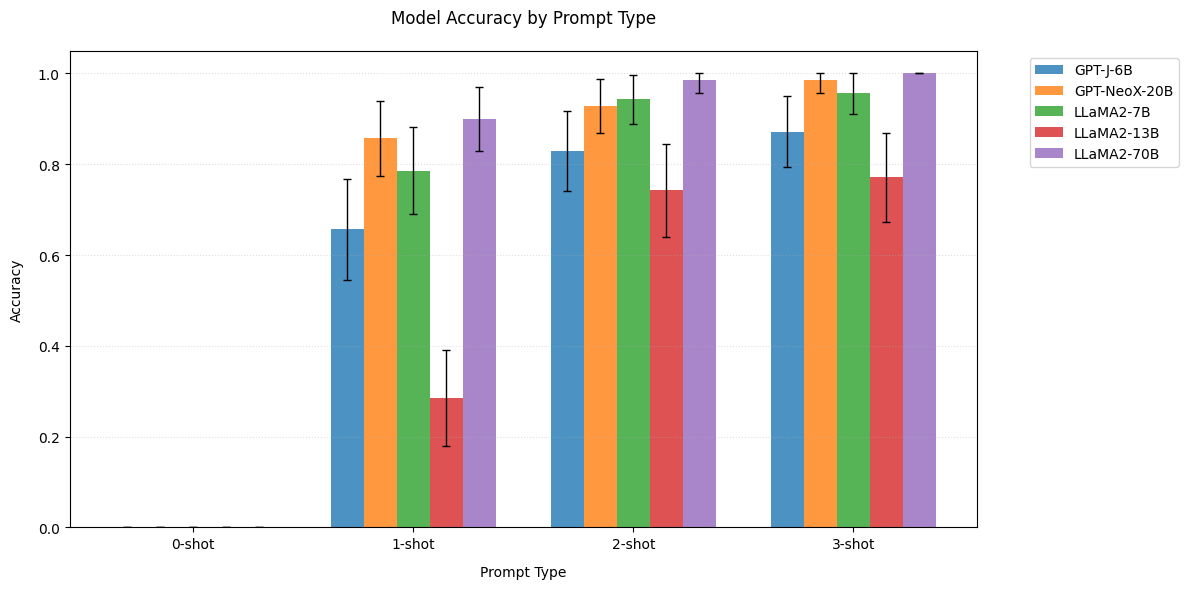

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

def plot_prompt_comparison(folder_paths, save_as_pdf=False, output_name="prompt_comparison.pdf"):
    """
    Creates a bar plot comparing model accuracies across different prompt types
    with a style similar to the reference plot.

    Args:
        folder_paths: List of paths to folders containing CSV results for each prompt type
        save_as_pdf: Whether to save as PDF
        output_name: Output filename
    """
    plt.figure(figsize=(12, 6))

    # Configuration
    PROMPT_MAPPING = {
        'Basic_NoPrompt_zeroShot_lastToken_FVsucc': '0-shot',
        'Basic_NoPrompt_oneShot_lastToken_FVsucc': '1-shot',
        'Basic_NoPrompt_twoShot_lastToken_FVsucc': '2-shot',
        'Basic_NoPrompt_threeShot_lastToken_FVsucc': '3-shot'
    }

    MODEL_ORDER = ['gptj6b', 'gptneox20b', 'llama27b', 'llama213b', 'llama270b']
    MODEL_DISPLAY_NAMES = {
        'gptj6b': 'GPT-J-6B',
        'gptneox20b': 'GPT-NeoX-20B',
        'llama27b': 'LLaMA2-7B',
        'llama213b': 'LLaMA2-13B',
        'llama270b': 'LLaMA2-70B'
    }

    COLORS = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
    BAR_WIDTH = 0.15
    ERROR_CAP_SIZE = 3

    # Prepare data structure
    data = {}
    for folder in folder_paths:
        prompt_type = os.path.basename(folder)
        prompt_name = PROMPT_MAPPING.get(prompt_type, prompt_type)
        data[prompt_name] = {}

        for csv_file in os.listdir(folder):
            if csv_file.endswith('.csv'):
                df = pd.read_csv(os.path.join(folder, csv_file))
                model = df['model_name'].iloc[0]
                if model in MODEL_ORDER:
                    data[prompt_name][model] = {
                        'acc': df['Accuracy'].iloc[0],
                        'ci_low': df['CI_low'].iloc[0],
                        'ci_high': df['CI_high'].iloc[0]
                    }

    # Get prompt types and model names
    prompt_types = sorted(data.keys())
    models = [m for m in MODEL_ORDER if m in MODEL_DISPLAY_NAMES]

    # Create plot
    x = np.arange(len(prompt_types))

    for i, model in enumerate(models):
        accs = [data[pt][model]['acc'] for pt in prompt_types]
        err_lows = [data[pt][model]['acc'] - data[pt][model]['ci_low'] for pt in prompt_types]
        err_highs = [data[pt][model]['ci_high'] - data[pt][model]['acc'] for pt in prompt_types]

        # Position each model's bars with offset
        x_pos = x + (i - len(models)/2 + 0.5) * BAR_WIDTH

        plt.bar(
            x_pos, accs,
            width=BAR_WIDTH,
            color=COLORS[i],
            label=MODEL_DISPLAY_NAMES[model],
            alpha=0.8
        )

        # Add error bars
        plt.errorbar(
            x_pos, accs,
            yerr=[err_lows, err_highs],
            fmt='none',
            ecolor='black',
            capsize=ERROR_CAP_SIZE,
            elinewidth=1
        )

    # Formatting
    plt.title('Model Accuracy by Prompt Type', pad=20)
    plt.xlabel('Prompt Type', labelpad=10)
    plt.ylabel('Accuracy', labelpad=10)
    plt.xticks(x, prompt_types)
    plt.ylim(0, 1.05)

    # Add grid and legend
    plt.grid(True, axis='y', linestyle=':', alpha=0.4)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    if save_as_pdf:
        plt.savefig(output_name, format='pdf', bbox_inches='tight', dpi=300)
        print(f"Graph saved as {output_name}")

    plt.show()

# Example usage:
folder_paths = [
    'results/Basic_NoPrompt_zeroShot_lastToken_FVsucc',
    'results/Basic_NoPrompt_oneShot_lastToken_FVsucc',
    'results/Basic_NoPrompt_twoShot_lastToken_FVsucc',
    'results/Basic_NoPrompt_threeShot_lastToken_FVsucc'
]

plot_prompt_comparison(folder_paths, save_as_pdf=True, output_name="multishot_lastToken_FVsucc.pdf")